Softmax Thresholding 0.40 - Acc. Known: 75.09%, Acc. Unk.: 74.32%, Pre. Unk.: 0.58%, Rec. Unk.: 0.38%, Balanced Acc.: 59.11%, Kappa: 65.63%


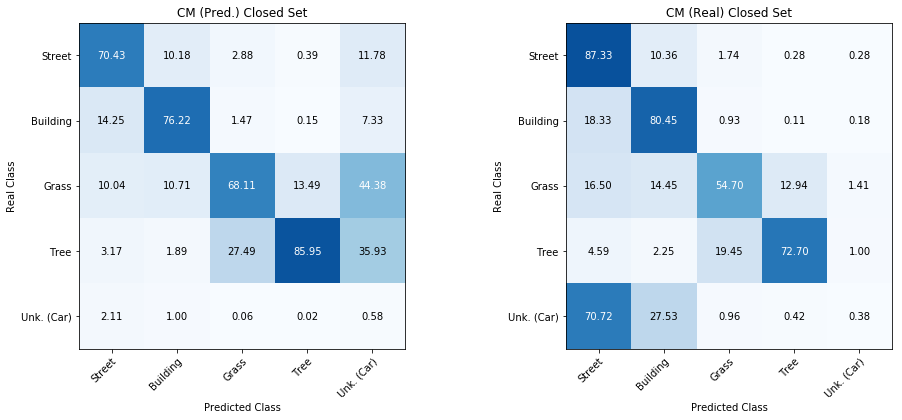

Softmax Thresholding 0.45 - Acc. Known: 74.69%, Acc. Unk.: 73.93%, Pre. Unk.: 0.57%, Rec. Unk.: 0.97%, Balanced Acc.: 58.88%, Kappa: 65.22%


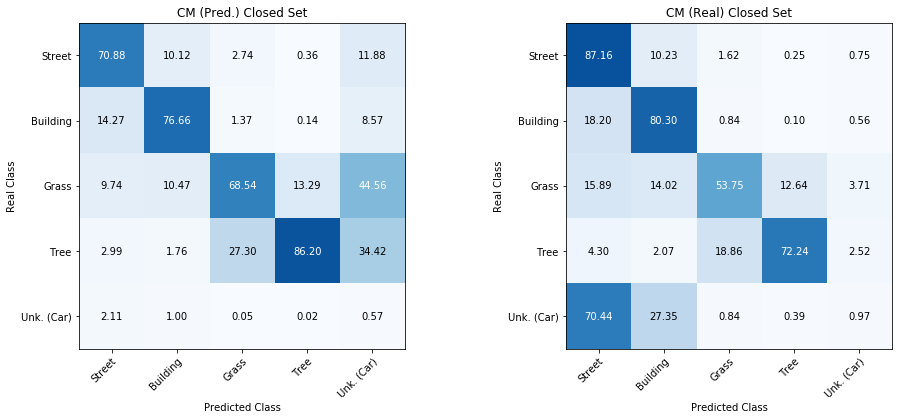

Softmax Thresholding 0.50 - Acc. Known: 73.81%, Acc. Unk.: 73.08%, Pre. Unk.: 0.70%, Rec. Unk.: 2.62%, Balanced Acc.: 58.46%, Kappa: 64.32%


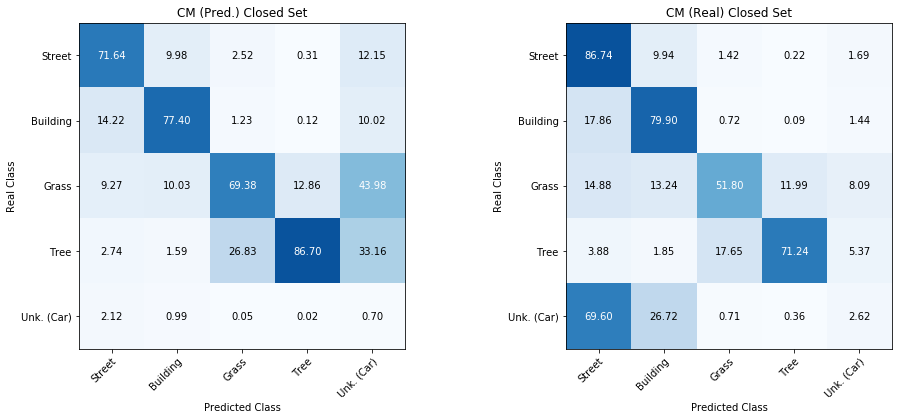

Softmax Thresholding 0.55 - Acc. Known: 72.15%, Acc. Unk.: 71.48%, Pre. Unk.: 0.89%, Rec. Unk.: 6.48%, Balanced Acc.: 57.84%, Kappa: 62.61%


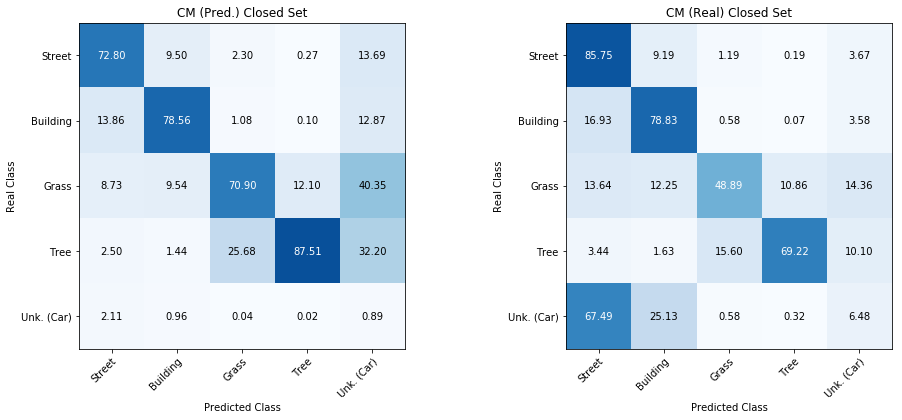

Softmax Thresholding 0.60 - Acc. Known: 70.40%, Acc. Unk.: 69.79%, Pre. Unk.: 0.97%, Rec. Unk.: 10.45%, Balanced Acc.: 57.16%, Kappa: 60.83%


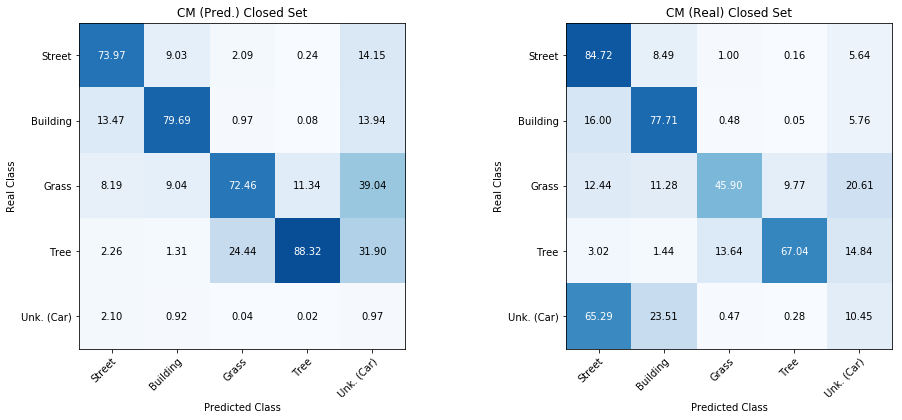

Softmax Thresholding 0.65 - Acc. Known: 68.53%, Acc. Unk.: 67.98%, Pre. Unk.: 1.01%, Rec. Unk.: 14.45%, Balanced Acc.: 56.40%, Kappa: 58.94%


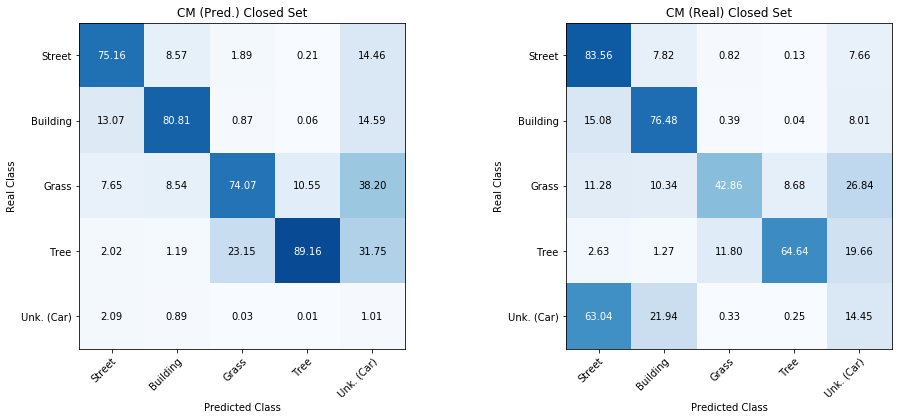

Softmax Thresholding 0.70 - Acc. Known: 66.48%, Acc. Unk.: 65.99%, Pre. Unk.: 1.03%, Rec. Unk.: 18.59%, Balanced Acc.: 55.51%, Kappa: 56.87%


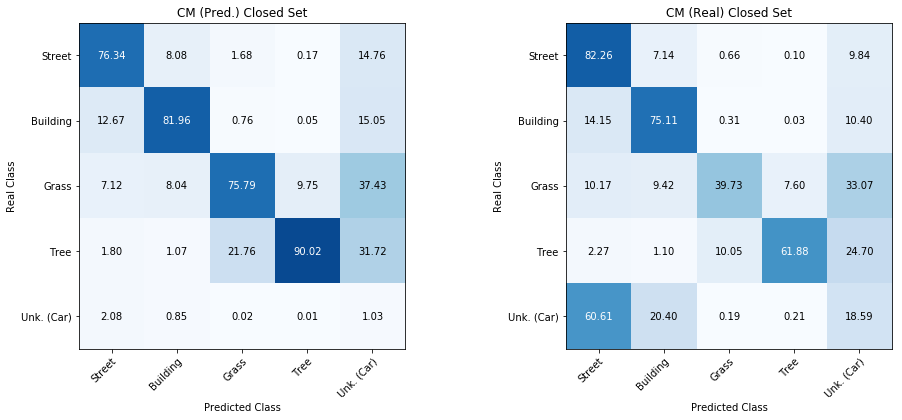

Softmax Thresholding 0.75 - Acc. Known: 64.16%, Acc. Unk.: 63.74%, Pre. Unk.: 1.05%, Rec. Unk.: 23.03%, Balanced Acc.: 54.48%, Kappa: 54.58%


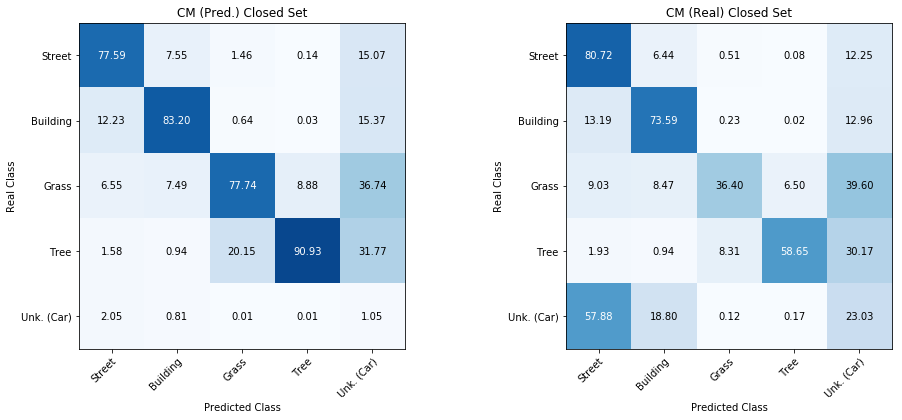

Softmax Thresholding 0.80 - Acc. Known: 61.44%, Acc. Unk.: 61.11%, Pre. Unk.: 1.07%, Rec. Unk.: 28.28%, Balanced Acc.: 53.28%, Kappa: 51.91%


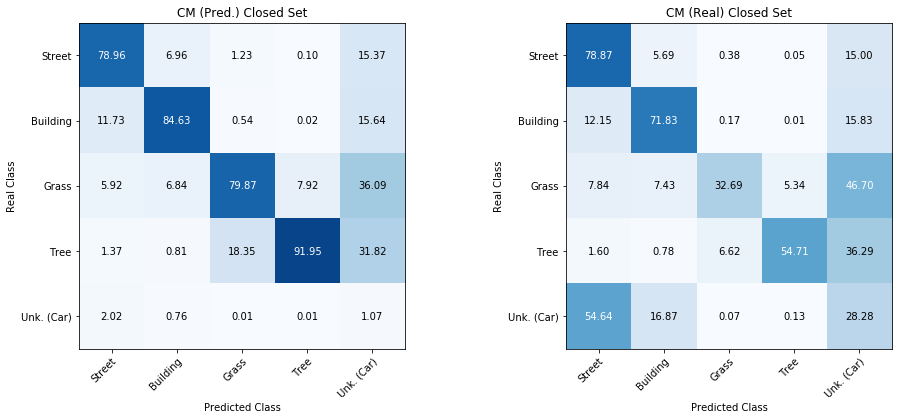

Softmax Thresholding 0.85 - Acc. Known: 58.07%, Acc. Unk.: 57.82%, Pre. Unk.: 1.08%, Rec. Unk.: 34.03%, Balanced Acc.: 51.64%, Kappa: 48.65%


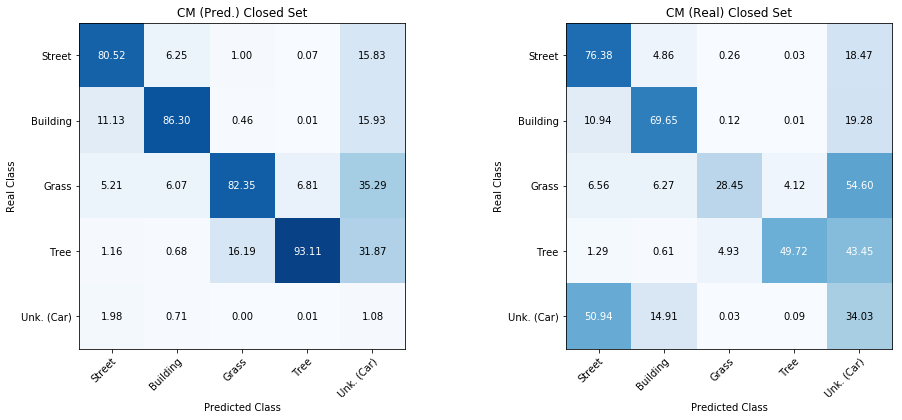

Softmax Thresholding 0.90 - Acc. Known: 53.48%, Acc. Unk.: 53.35%, Pre. Unk.: 1.08%, Rec. Unk.: 41.27%, Balanced Acc.: 49.34%, Kappa: 44.29%


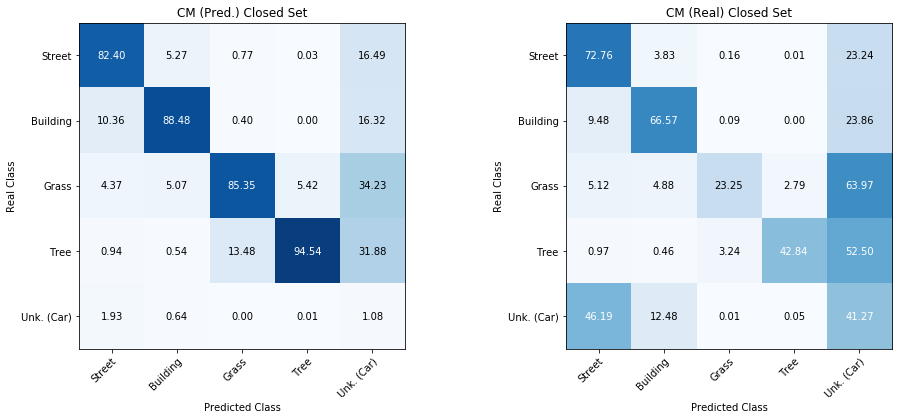

Softmax Thresholding 0.95 - Acc. Known: 46.02%, Acc. Unk.: 46.09%, Pre. Unk.: 1.09%, Rec. Unk.: 52.16%, Balanced Acc.: 45.46%, Kappa: 37.41%


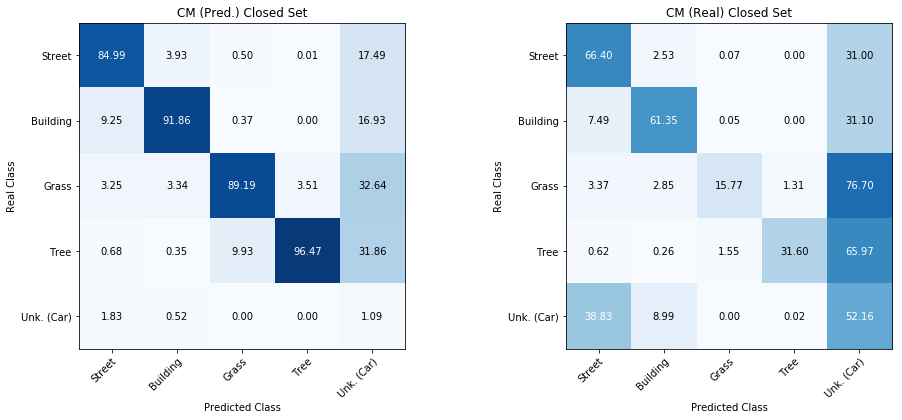

In [1]:
import os
import numpy as np
import matplotlib as mplt

from skimage import io

from sklearn import metrics

from matplotlib import pyplot as plt
from matplotlib import lines

%matplotlib inline

def plot_confusion_matrix(cm, classes, ax, title, cmap):
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap, vmin=0.0, vmax=100.0)
    if title is not None:
        ax.set_title(title)
    
    # ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks...
    ax.set(xticklabels=classes, yticklabels=classes,
           ylabel='Real Class',
           xlabel='Predicted Class')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

'''
Classes:
    0 = Street
    1 = Building
    2 = Grass
    3 = Tree
    4 = Car
    5 = Surfaces
    6 = Boundaries
'''

##########################################################################################
##########################################################################################
##########################################################################################

epoch = 200

# conv_name = 'unet'
conv_name = 'fcnresnet50'
# conv_name = 'fcnresnext50'
# conv_name = 'fcnwideresnet50'
# conv_name = 'segnet'

dataset_name = 'Vaihingen'
# dataset_name = 'Potsdam'


# n_known = 4
# class_unk = 0
# classes = ['', 'Building', 'Grass', 'Tree', 'Car', 'Unk. (Street)']

# n_known = 4
# class_unk = 1
# classes = ['', 'Street', 'Grass', 'Tree', 'Car', 'Unk. (Building)']

# n_known = 4
# class_unk = 2
# classes = ['', 'Street', 'Building', 'Tree', 'Car', 'Unk. (Grass)']

# n_known = 4
# class_unk = 3
# classes = ['', 'Street', 'Building', 'Grass', 'Car', 'Unk. (Tree)']

n_known = 4
class_unk = 4
classes = ['', 'Street', 'Building', 'Grass', 'Tree', 'Unk. (Car)']

# n_known = 3
# class_unk = '0_1'
# classes = ['', 'Grass', 'Tree', 'Car', 'Unk. (Street/Building)']

# n_known = 3
# class_unk = '2_3'
# classes = ['', 'Street', 'Building', 'Car', 'Unk. (Grass/Tree)']

# n_known = 2
# class_unk = '0_1_4'
# classes = ['', 'Grass', 'Tree', 'Unk. (Street/Building/Car)']

# n_known = 2
# class_unk = '2_3_4'
# classes = ['', 'Street', 'Building', 'Unk. (Grass/Tree/Car)']

img_dir = './outputs/%s_%s_softmax_%s/epoch_%d/' % (conv_name, dataset_name, str(class_unk), epoch)
# img_dir = './outputs/backup_%s_%s_openpca_full_%s/epoch_%d/' % (conv_name, dataset_name, str(class_unk), epoch)

##########################################################################################
##########################################################################################

thresholds = [0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95]

files = [f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f)) and '_true_' in f]

tru_list = []
pro_list = []

for i, f in enumerate(files):

    tru_path = os.path.join(img_dir, f)
    pro_path = os.path.join(img_dir, f.replace('_true_', '_prob_').replace('.png', '.npy'))

    try:
        tru = io.imread(tru_path)
        pro = np.load(pro_path)
    except:
        print('Error in loading sample "' + f + '"')
        break

    tru_list.append(tru)
    pro_list.append(pro)

pro_list = np.asarray(pro_list)
tru_list = np.asarray(tru_list)

cm_list = []
acc_known_list = []
pre_unk_list = []
rec_unk_list = []
acc_unknown_list = []
acc_mean_list = []
acc_bal_list = []
kappa_list = []

for t in thresholds:
    
    pos_np = pro_list.argmax(axis=3)
    pos_np[pro_list.max(axis=3) < t] = n_known
    
    pos_np = pos_np.ravel()
    tru_np = tru_list.ravel()

    tru_valid = tru_np[tru_np < 5]
    pos_valid = pos_np[tru_np < 5]

    cm = metrics.confusion_matrix(tru_valid, pos_valid)

    tru_known = 0.0
    sum_known = 0.0

    for c in range(n_known):
        tru_known += float(cm[c, c])
        sum_known += float(cm[c, :].sum())

    acc_known = float(tru_known) / float(sum_known)

    tru_unknown = float(cm[n_known, n_known])
    sum_unknown_real = float(cm[n_known, :].sum())
    sum_unknown_pred = float(cm[:, n_known].sum())

    pre_unknown = 0.0
    rec_unknown = 0.0
    
    if sum_unknown_pred != 0.0:
        pre_unknown = float(tru_unknown) / float(sum_unknown_pred)
    if sum_unknown_real != 0.0:
        rec_unknown = float(tru_unknown) / float(sum_unknown_real)

    acc_unknown = (tru_known + tru_unknown) / (sum_known + sum_unknown_real)

    acc_mean = (acc_known + acc_unknown) / 2.0

    bal = metrics.balanced_accuracy_score(tru_valid, pos_valid)
    kap = metrics.cohen_kappa_score(tru_valid, pos_valid)

    print('Softmax Thresholding %.2f - Acc. Known: %.2f%%, Acc. Unk.: %.2f%%, Pre. Unk.: %.2f%%, Rec. Unk.: %.2f%%, Balanced Acc.: %.2f%%, Kappa: %.2f%%' % (t, acc_known * 100.0, acc_unknown * 100.0, pre_unknown * 100.0, rec_unknown * 100.0, bal * 100.0, kap * 100.0))

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    cm_pred = cm.astype(np.float32)
    for c in range(n_known + 1):
        cm_pred[:(n_known + 1), c] /= cm_pred[:(n_known + 1), c].sum()
    plot_confusion_matrix(cm_pred[:(n_known + 1), :(n_known + 1)] * 100.0, classes, ax[0], 'CM (Pred.) Closed Set', plt.cm.Blues)

    cm_real = cm.astype(np.float32)
    for c in range(n_known + 1):
        cm_real[c, :(n_known + 1)] /= cm_real[c, :(n_known + 1)].sum()
    plot_confusion_matrix(cm_real[:(n_known + 1), :(n_known + 1)] * 100.0, classes, ax[1], 'CM (Real) Closed Set', plt.cm.Blues)

    plt.show()

    acc_known_list.append(acc_known)
    pre_unk_list.append(pre_unknown)
    rec_unk_list.append(rec_unknown)
    acc_unknown_list.append(acc_unknown)
    acc_mean_list.append(acc_mean)
    acc_bal_list.append(bal)
    kappa_list.append(kap)

thresholds = np.asarray(thresholds)
acc_known_list = np.asarray(acc_known_list) * 100
pre_unk_list = np.asarray(pre_unk_list) * 100
rec_unk_list = np.asarray(rec_unk_list) * 100
acc_unknown_list = np.asarray(acc_unknown_list) * 100
acc_mean_list = np.asarray(acc_mean_list) * 100
acc_bal_list = np.asarray(acc_bal_list) * 100
kappa_list = np.asarray(kappa_list) * 100

In [2]:
for i in range(len(thresholds)):
    
    print('%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f' % (acc_known_list[i],
                                                  acc_unknown_list[i],
                                                  pre_unk_list[i],
                                                  rec_unk_list[i],
                                                  acc_bal_list[i],
                                                  kappa_list[i]))

75.09	74.32	0.58	0.38	59.11	65.63
74.69	73.93	0.57	0.97	58.88	65.22
73.81	73.08	0.70	2.62	58.46	64.32
72.15	71.48	0.89	6.48	57.84	62.61
70.40	69.79	0.97	10.45	57.16	60.83
68.53	67.98	1.01	14.45	56.40	58.94
66.48	65.99	1.03	18.59	55.51	56.87
64.16	63.74	1.05	23.03	54.48	54.58
61.44	61.11	1.07	28.28	53.28	51.91
58.07	57.82	1.08	34.03	51.64	48.65
53.48	53.35	1.08	41.27	49.34	44.29
46.02	46.09	1.09	52.16	45.46	37.41
